In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# !pip install mglearn
# 학습데이터 시각화

### KNN(최근접이웃) 알고리즘

In [18]:
import mglearn

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


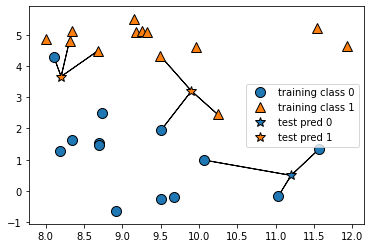

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors= 3)

In [20]:
x,y = mglearn.datasets.make_forge()
y

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
knn.score(x_train,y_train)

0.9

In [25]:
knn.score(x_test,y_test)

1.0

### 과적합(overfitting)

* 알고리즘이 train data에 과도하게 학습이 되어 train data를 잘 맞추고 test data를 잘 맞추지 못하는 현상
* 모델이 train data를 잘 맞추도록 지나치게 복잡하게 만들어진 경우

### 과적합을 해소하기 위해서
* 데이터를 많이 확보
* 모델을 단순화시킨다 (학습을 방해)
* 단순한 모델을 사용

In [27]:
# fig, axes = plt.subplots(1,3, figsize=(10,3))

# for n_neighbors, ax in zip([1,3,9], axes):
#     knn = KNeighborsClassifier(n_neighbors = n_neighbors).fit(x,y)
#     mglearn.plots.plot_2d_separator(clf, x, fill=True, eps =0.5, ax=ax, alpha=0.4)
#     mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)

NameError: name 'X' is not defined

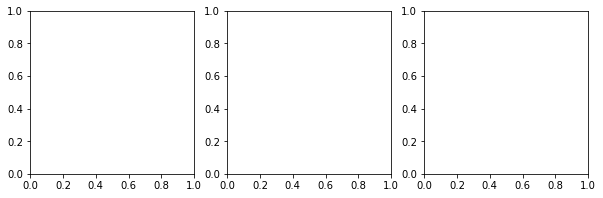

In [28]:
# binary classification

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

In [29]:
#

In [ ]:
# 전체적으로 train data accuarcy


### 회귀분석

In [44]:
house_df = pd.read_csv('./data_ml/house_price.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
nul = house_df.isnull().sum().sort_values(ascending=False)
nul

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [ ]:
x = house_df.drop(['PoolQC','MiscFeature','Alley','FireplaceQu','Fence'],inplace=True)

In [ ]:
house_df.fillna(house_df.mean())

In [ ]:
house_df_ohe = pd.get_dummies(house_df)

In [ ]:
house

In [38]:
y = house_df_ohe['SalePrice']
x = house_df_ohe.drop(['SalePrice','Id'], axis =1)

NameError: name 'house_df_ohe' is not defined

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)

In [ ]:
train_mse = mean_squared_error(y_train, preds)
test_mse = mean_squared_error(y_test, preds)

In [ ]:
print(train_mse, test_mse, train_mse/test_mse)  
# train에서 오차가 매우 작음 => 모델 과적합 => 모델을 단순화

In [39]:
lr.coef_  # 계수가 273개인 매우 복잡한 회귀모델 => 과적합

NameError: name 'lr' is not defined

## 회귀모델의 과적합 해소 => 회귀모델을 단순화
#### 1. 변수의 수를 줄인다 => lasso
#### 2. 계수의 값을 작게 만든다 => ridge

In [47]:
from sklearn.linear_model import Ridge,Lasso

In [46]:
rid = Ridge()
rid.fit(x_train,y_train)
rid_train_preds = rid.predict(x_train)
rid_test_preds = rid.predict(x_test)

print(mean_squared_error(y_train,rid_train_preds))
print(mean_squared_error(y_test,rid_test_preds))


NameError: name 'mean_squared_error' is not defined